**Put any package imports you need in the below space**

In [173]:
import networkx as nx
import numpy as np
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import linalg as la


**Exercise 1**: Generating the data set. Generate a total of 60 points whose (x,y)-coordinates are drawn from a mixture of three Gaussians in a 2-dimentional real space. Each mixture has a mean of 2, 4, and 6, respectively, a standard deviation of one, and about 20 points.

1. Plot all the points in a single 2-dimensional space by using different shapes for each mixture.

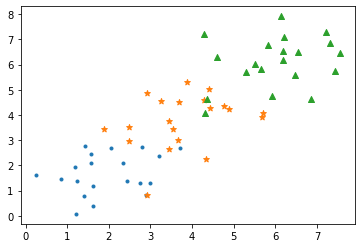

In [174]:
data = []
x_cord1=[]
y_cord1=[]
for i in range(20):

        x = np.random.normal(2, 1)
        y = np.random.normal(2, 1)
        data.append((x,y))
        x_cord1.append(x)
        y_cord1.append(y)
plt.scatter(x_cord1, y_cord1, marker=".")
x_cord2=[]
y_cord2=[]
for i in range(20):
        x_cord=[]
        y_cord=[]
        x = np.random.normal(4, 1)
        y = np.random.normal(4, 1)
        data.append((x,y))
        x_cord2.append(x)
        y_cord2.append(y)
plt.scatter(x_cord2, y_cord2, marker="*")
x_cord3=[]
y_cord3=[]
for i in range(20):
        x_cord=[]
        y_cord=[]
        x = np.random.normal(6, 1)
        y = np.random.normal(6, 1)
        data.append((x,y))
        x_cord3.append(x)
        y_cord3.append(y)
plt.scatter(x_cord3, y_cord3, marker="^")



2. Plot a histogram of all the points.

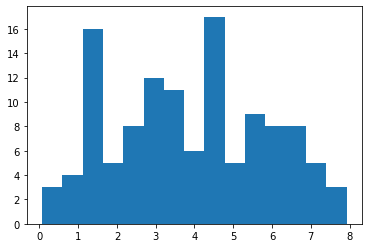

In [175]:
hist_points = x_cord1+y_cord1+x_cord2+y_cord2+x_cord3+y_cord3
plt.hist(hist_points,bins= 15)
plt.show()

**Exercise 2**: Generating the similarity graphs. Write a script that generates the following similarity graphs for the data set in Exercise 1 (see Lecture Notes):

1. KNN: The K-nearest neighbor graph using the value of K=10. Plot the graph.
2. GK: The complete similarity graph using the Gaussian kernel with sigma=1 as similarity function. Plot the graph.


60


Text(0.5, 1.0, 'K-Nearest Neighbor Graph')

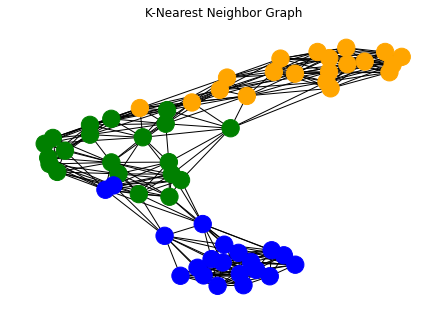

In [176]:
print(len(data))
knn = kneighbors_graph(data, 10)
knn_adj= knn.toarray()
nodecolor = ['orange' for i in range(20)] + ['green' for i in range(20,40)] + ['blue' for i in range(40,60)]
knn_graph = nx.from_numpy_matrix(knn_adj) 
nx.draw(knn_g, node_color = nodecolor)
plt.title("K-Nearest Neighbor Graph")

Text(0.5, 1.0, 'Gaussian kernel Similarity Graph')

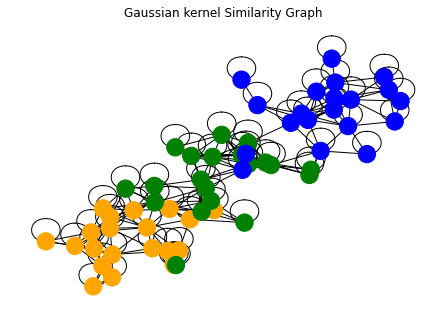

In [177]:
sigma=1
gaussian_mat= np.zeros((60, 60))
for i in range(60):
    for j in range(60):
        dist = np.linalg.norm(np.asarray(data[i])-np.asarray(data[j]))
        sim = np.exp(-dist**2/(2.*(sigma**2.)))
        if sim > 0.5:
            gaussian_mat[i][j] = 1
gaussiankernel_graph = nx.from_numpy_matrix(gaussian_mat) 
nx.draw(gaussiankernel_graph,data, node_color = nodecolor)
plt.title("Gaussian kernel Similarity Graph")

**Exercise 3**: Characterizing the graph spectra. Write a script that generates the graph Laplacian matrix L = D - A and the normalized graph Laplacian matrix $\hat{L} = I - \hat{A}$ and calculates the graph spectra for each of the graphs in Exercise 2.

Plot each graph's eigenspectra as a separate figure with i as x-axis and $\lambda_i$ as y-axis (four lines).


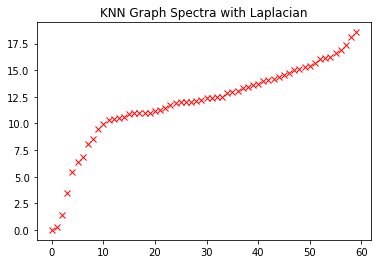

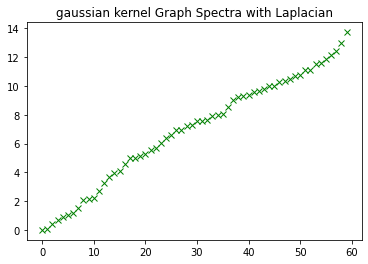

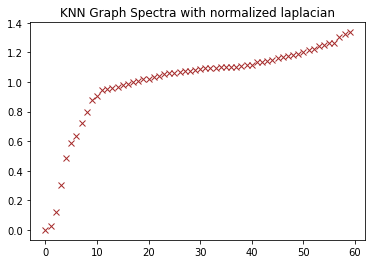

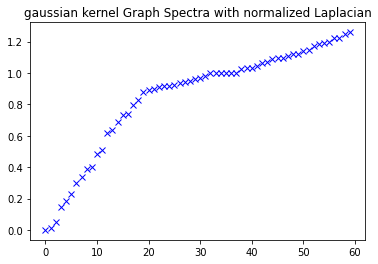

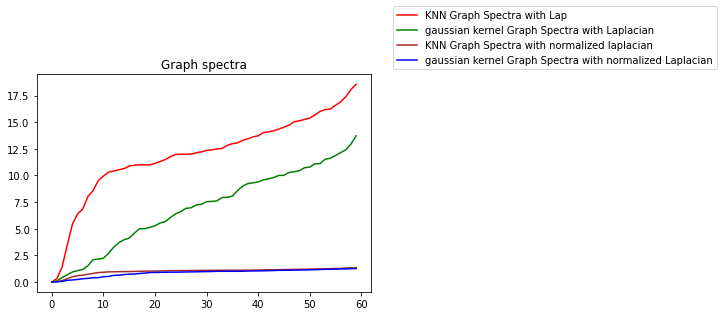

In [178]:
# Laplacian matrix
knn_laplacian = nx.laplacian_matrix(knn_graph)
gaussiankernel_laplacian = nx.laplacian_matrix(gaussiankernel_graph)
knn_norm_laplacian = nx.normalized_laplacian_matrix(knn_graph)
gaussiankernel_norm_laplacian = nx.normalized_laplacian_matrix(gaussiankernel_graph)

# spectra
knn_graph_spectra = nx.laplacian_spectrum(knn_graph)
gaussiankernel_spectra = nx.laplacian_spectrum(gaussiankernel_graph)
knn_spectra_eigen= np.linalg.eigvals(knn_norm_laplacian.todense())
gaussiankernel_spectra_eigen = np.linalg.eigvals(gaussiankernel_norm_laplacian.todense())


plt.plot(sorted(knn_graph_spectra), "x",color="red")
plt.title("KNN Graph Spectra with Laplacian")
plt.show()
plt.plot(sorted(gaussiankernel_spectra), "x",color="green")
plt.title("gaussian kernel Graph Spectra with Laplacian")
plt.show()
plt.plot(sorted(knn_spectra_eigen), "x",color="brown")
plt.title("KNN Graph Spectra with normalized laplacian")
plt.show()
plt.plot(sorted(gaussiankernel_spectra_eigen), "x",color="blue")
plt.title("gaussian kernel Graph Spectra with normalized Laplacian")
plt.show()

fig = plt.figure()
fig = fig.add_subplot(111)
plt.title("Graph spectra")
fig.plot(sorted(knn_graph_spectra),color="red", label='KNN Graph Spectra with Lap')
fig.plot(sorted(gaussiankernel_spectra),color="green" , label='gaussian kernel Graph Spectra with Laplacian')
fig.plot(sorted(knn_spectra_eigen),color="brown",  label='KNN Graph Spectra with normalized laplacian')
fig.plot(sorted(gaussiankernel_spectra_eigen),color="blue",  label='gaussian kernel Graph Spectra with normalized Laplacian')
plt.legend(bbox_to_anchor=(1.05, 1), loc=3)


*What do you observe about the multiplicity of the "close to" zero eigenvalues? Are your observations consistent with the Properties described in lecture notes?*


Answer: here we can see 3 eigen values are close to zero indicating that they are disconnected forming 3 communities.

Plot each graph's eigenvector plot for the eigenvector u corresponding to the second smallest eigenvalue, with i as x-axis and u_i vector component as y-axis.

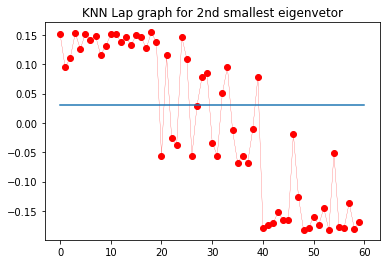

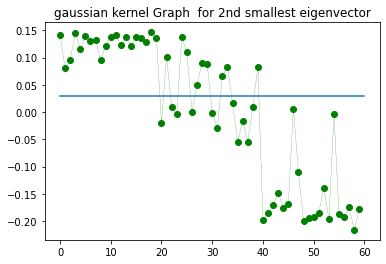

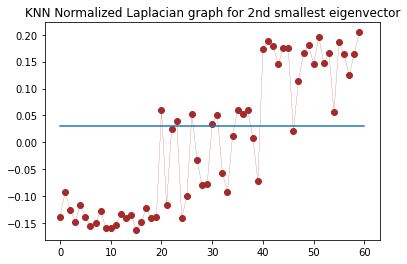

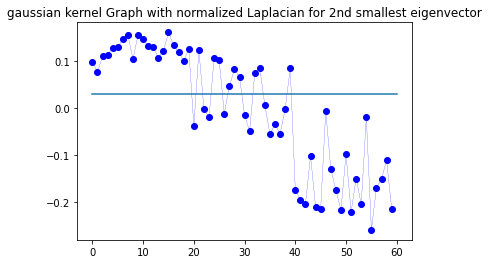

In [179]:
def eigen_value(matrix, color, title):
    eigen_val, eig_vec  = la.eig(matrix)
    ind = [ i[0] for i in sorted(enumerate(eigen_val), key=lambda x:x[1]) ][1]
    vect = np.real(eig_vec[:,ind])
    plt.plot(vect, marker="o", color=color, linewidth=0.2)
    plt.plot((0,60), (0.03,0.03))
    plt.title(title)
    plt.show()

eigen_value(knn_laplacian.todense(), "red", "KNN Lap graph for 2nd smallest eigenvetor")
eigen_value(gaussiankernel_laplacian.todense(), "green", "gaussian kernel Graph  for 2nd smallest eigenvector")
eigen_value(knn_norm_laplacian.todense(), "brown", "KNN Normalized Laplacian graph for 2nd smallest eigenvector")
eigen_value(gaussiankernel_norm_laplacian.todense(), "blue", "gaussian kernel Graph with normalized Laplacian for 2nd smallest eigenvector")

*If you were using this plot for 2-way graph partitioning into S and V-S, the points from which mixtures will end up in which partition?*


Answer:  Consider threshold= 0.03, we see the first 20 points would be in first partition,  second 20 points(mean=4) would be in both partitions, and the last 20 points(mean=6) would be in the second parition.

Calculate the conductance (write the script) for each of the identified partitions, S and V-S for the KNN graph using both the normalized and unnormalized Laplacian. Also, calculate the lower and upper bounds for the graph conductance using the inequalities provided in the lecture notes. Print the results of these calculations (make sure to label them).

In [185]:
def conductance(matrix):
    eign, evec  = la.eig(matrix)
    index = [ i[0] for i in sorted(enumerate(eign), key=lambda x:x[1]) ][1]
    value = np.real(eign[index])
    vector = np.real(evec[:,index])
    community1 = list(np.nonzero(vector > 0)[0])
    community2 = list(np.nonzero(vector <= 0)[0])
    lower = value / 2
    upper = np.sqrt(2*value)
    
    edges = nx.edges(knn_graph, community1)
    out = len(edges)
    for edge in edges:
        #Decrease count if the edge is internal
        if edge[0] in community1 and edge[1] in community1:
            out -= 1
    conductance1 = out/len(edges)
    edges = nx.edges(knn_graph, community2)
    out = len(edges)
    for edge in edges:
        #Decrease count if the edge is internal
        if edge[0] in community2 and edge[1] in community2:
            out -= 1
    conductance2 = out/len(edges)
    print("conductance for first community:",conductance1)
    print("conductance for second community:",conductance1)
    print("Lower bound:",lower )
    print("Upper bound:",upper )

print("KNN graph with  Laplacian")
conductance(knn_laplacian.todense())
print("KNN graph with normalized Laplacian")
conductance(knn_norm_laplacian.todense())

KNN graph with  Laplacian
conductance for first community: 0.08839779005524862
conductance for second community: 0.08839779005524862
Lower bound: 0.15934120225295753
Upper bound: 0.7983513067640273
KNN graph with normalized Laplacian
conductance for first community: 0.08290155440414508
conductance for second community: 0.08290155440414508
Lower bound: 0.013402908743856187
Upper bound: 0.23154186441208585


**Exercise 4**: Spectral graph clustering. Write a script that performs spectral graph clustering using the normalized graph Laplacian of each of the graph in Exercise 2. The pseudo-code of the clustering method is described in the lecture notes. For the k-means clustering method use the value of k=3. Run the spectral graph clustering and plot the corresponding points in Ex.1 with the shapes based on the identified cluster (one plot for each graph). In addition, run the k-means clustering algorithm on the data set in Exercise 1, using the Euclidean distance as the dissimilarity metric, and the value of k=3. Plot these results in 2-dimensional space but use different shape for each of the identified cluster. You should have three plots: two for each graph using spectral clustering, and one for k-means on the original data.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


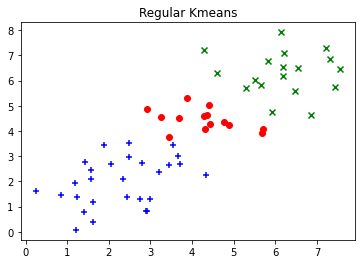

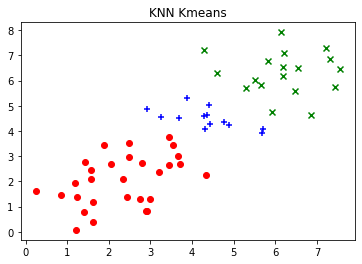

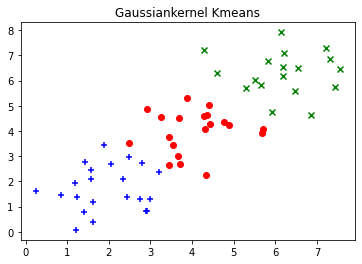

In [197]:


## regular k_means model
kmeans_mat = np.array(data)
kmeans_model = KMeans(n_clusters= 3)
kmeans_model.fit(kmeans_mat)
reg_kmeans_lab = kmeans_model.labels_

## knn_kmeans_model
vals1,vec1 = np.linalg.eig(knn_norm_laplacian.todense())
vec1 = vec1[:,np.argsort(vals1)]
vals1 = vals1[np.argsort(vals1)]
knn_kmeans_model = KMeans(n_clusters=3)
knn_kmeans_model.fit(vec1[:,1:4])
knn_kmeans_label = knn_kmeans_model.labels_

## gaussian kernel_kmeans_model
vals2,vec2 = np.linalg.eig(gaussiankernel_norm_laplacian.todense())
vec2 = vec2[:,np.argsort(vals2)]
vals2 = vals2[np.argsort(vals2)]
gaussiankernel_kmeans_model = KMeans(n_clusters=3)
gaussiankernel_kmeans_model.fit(vec2[:,1:4])
gaussiankernel_kmeans_label = gaussiankernel_kmeans_model.labels_

colors = ["red", "green", "blue"]
markers = ["o", "x", "+"]
labels = [ "Regular Kmeans","KNN Kmeans", "Gaussiankernel Kmeans"]
clusters = [knn_kmeans_label, gaussiankernel_kmeans_label, reg_kmeans_lab ]
for l,c in zip(labels, clusters):
    for i,p in enumerate(data):
        plt.scatter(p[0], p[1], c=colors[c[i]], marker=markers[c[i]])
    plt.title(l)
    plt.show()